<a href="https://colab.research.google.com/github/AdityaKalkeri/Evaluation_Projects/blob/main/Project19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("viridis")

In [3]:
from google.colab import files
upload = files.upload()

Saving ElectionData.csv to ElectionData.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(upload['ElectionData.csv']))

In [5]:
df.shape

(21643, 28)

In [6]:
df.head(10)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
5,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PAN,0,1.76,1.84,6786,4,4
6,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CH,0,0.95,0.99,3659,2,1
7,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,R.I.R.,0,0.88,0.93,3412,2,0
8,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCTP/MRPP,0,0.66,0.70,2567,1,0
9,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,A,0,0.48,0.51,1870,1,0


TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition

time (timestamp): Date and time of the data acquisition

territoryName (string): Short name of the location (district or nation-wide)

totalMandates (numeric): MP's elected at the moment

availableMandates (numeric): MP's left to elect at the moment

numParishes (numeric): Total number of parishes in this location

numParishesApproved (numeric): Number of parishes approved in this location

blankVotes (numeric): Number of blank votes

blankVotesPercentage (numeric): Percentage of blank votes

nullVotes (numeric): Number of null votes

nullVotesPercentage (numeric): Percentage of null votes

votersPercentage (numeric): Percentage of voters

subscribedVoters (numeric): Number of subscribed voters in the location

totalVoters (numeric): Percentage of blank votes

pre.blankVotes (numeric): Number of blank votes (previous election)

pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)

pre.nullVotes (numeric): Number of null votes (previous election)

pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)

pre.votersPercentage (numeric): Percentage of voters (previous election)

pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)

pre.totalVoters (numeric): Percentage of blank votes (previous election)

Party (string): Political Party

Mandates (numeric): MP's elected at the moment for the party in a given district

Percentage (numeric): Percentage of votes in a party

validVotesPercentage (numeric): Percentage of valid votes in a party

Votes (numeric): Percentage of party votes

Hondt (numeric): Number of MP's according to the distribution of votes now

FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [7]:
df.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

In [8]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [9]:
df['time'] = pd.to_datetime(df['time'])

# Exploratory Data Analysis

Since we will be doing regression analysis, we wont be needing time related features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

## Categorical Features

In [11]:
# There are two categorical features: territoryName and Party. The rest is numeric data

In [12]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [13]:
time = df[df['TimeElapsed'] == 265]


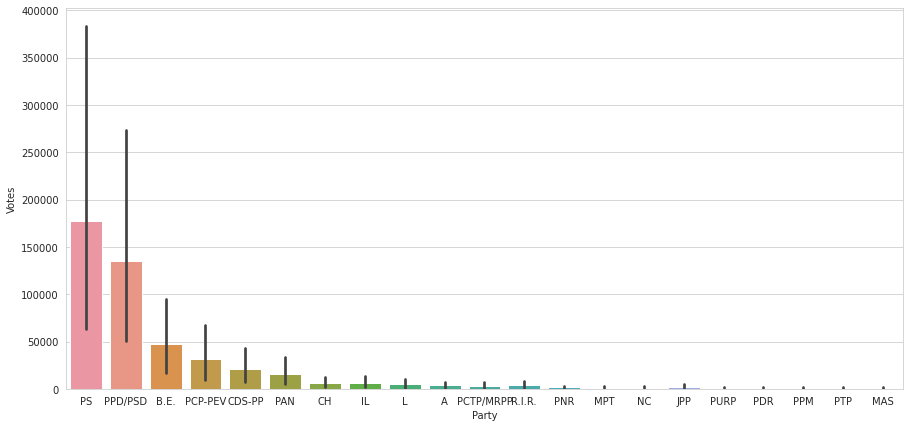

In [14]:
plt.figure().set_size_inches(15,7)
sns.barplot(x = 'Party', y = 'Votes', data = time)

As we can see, the party 'PS' is getting max votes, with PPD/PSD coming second.

Many Smaller parties are getting very little votes

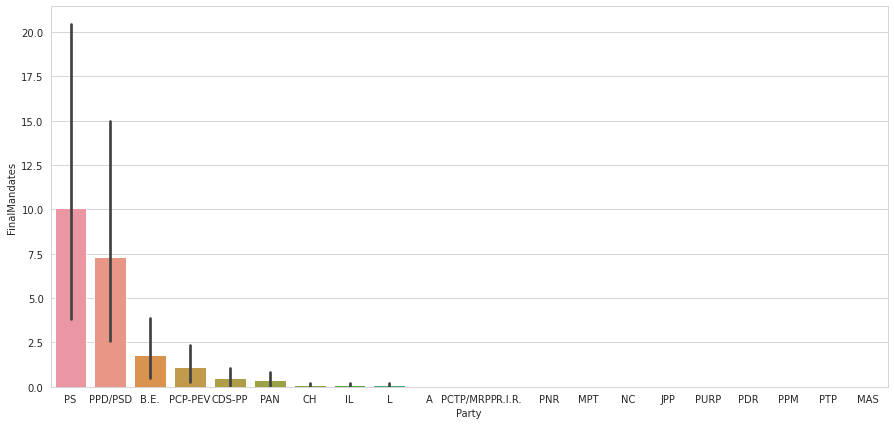

In [15]:
plt.figure().set_size_inches(15,7)
sns.barplot(x = 'Party', y = 'FinalMandates', data = time)

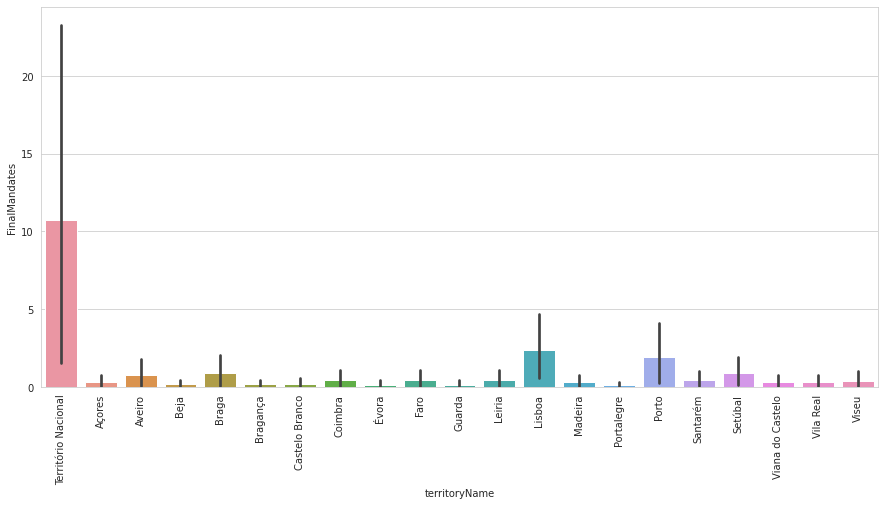

In [16]:
plt.figure().set_size_inches(15,7)
plot = sns.barplot(x = 'territoryName',y = 'FinalMandates', data = time)
for item in plot.get_xticklabels():
    item.set_rotation(90)

So most of the mandates are from the Território Nacional region.

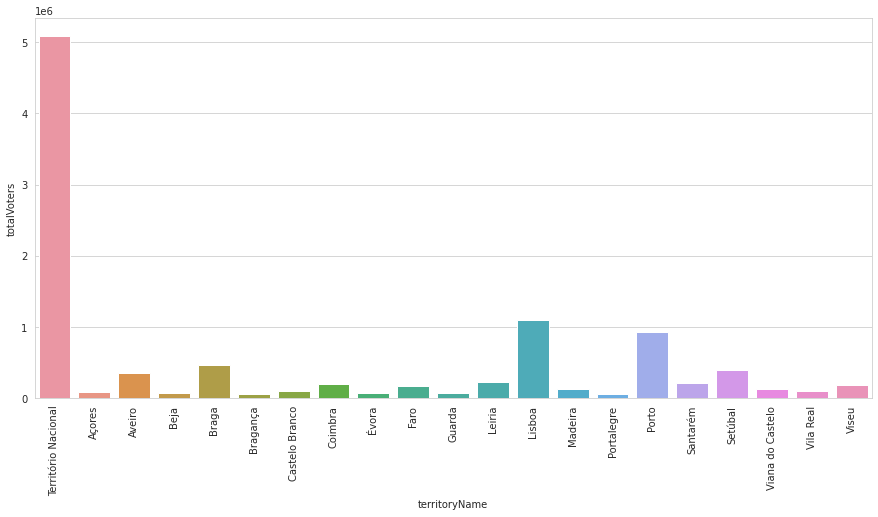

In [17]:
plt.figure().set_size_inches(15,7)
plot = sns.barplot(x = 'territoryName',y = 'totalVoters', data = time)
for item in plot.get_xticklabels():
    item.set_rotation(90)

So the number of voters from Território Nacional, which explains the number of mandates in that area

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

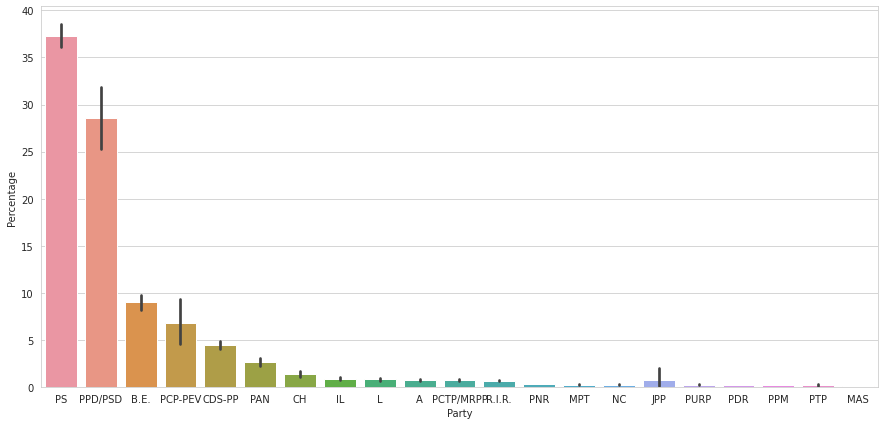

In [19]:
plt.figure().set_size_inches(15,7)
sns.barplot(x = 'Party', y = 'Percentage', data = time)

So around 38% of people voted for 'PS', while the runner up party had 28%

In [20]:
#Numerical variables

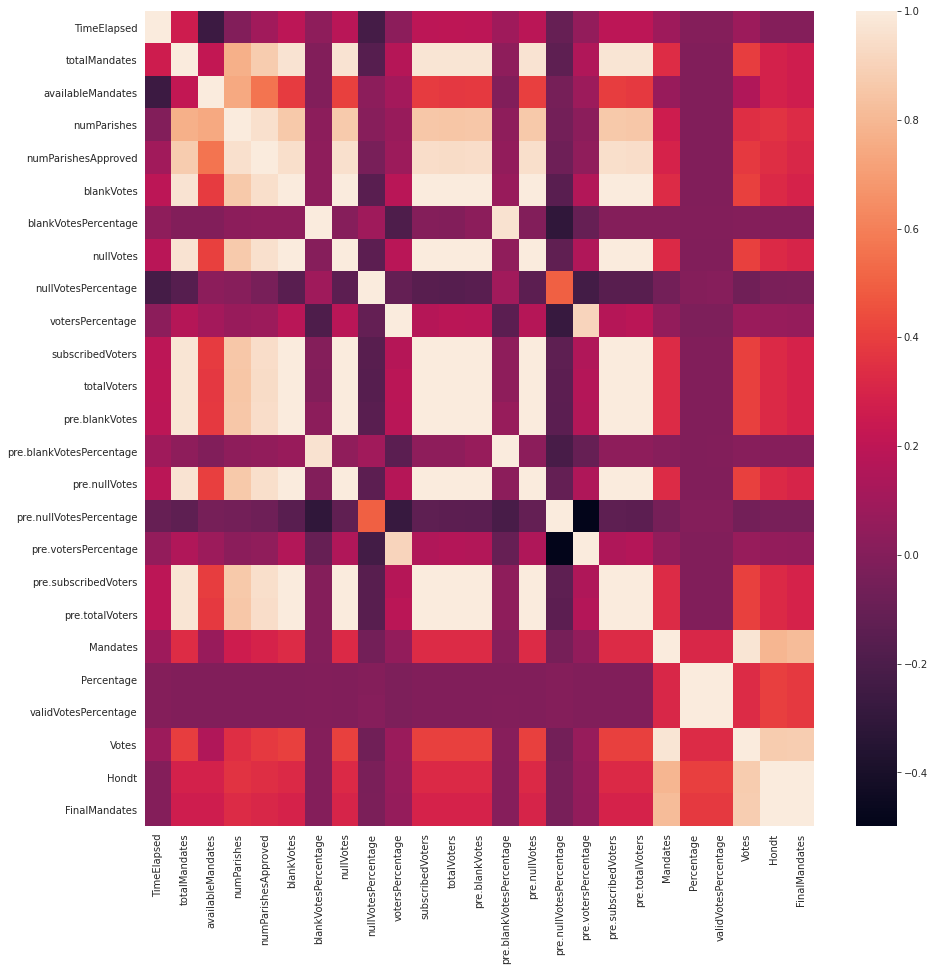

In [22]:
plt.figure().set_size_inches(15,15)
sns.heatmap(df.corr())

Many of the variables are correlated, we can apply PCA to reduce the number of features

In [23]:
def scatter(column):
  plt.figure().set_size_inches(15,7)
  sns.scatterplot(x = column, y = 'FinalMandates', data = df)

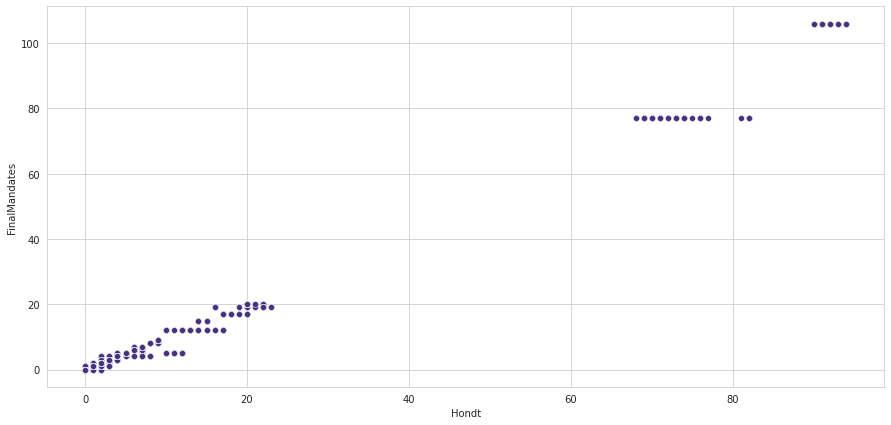

In [24]:
scatter("Hondt")

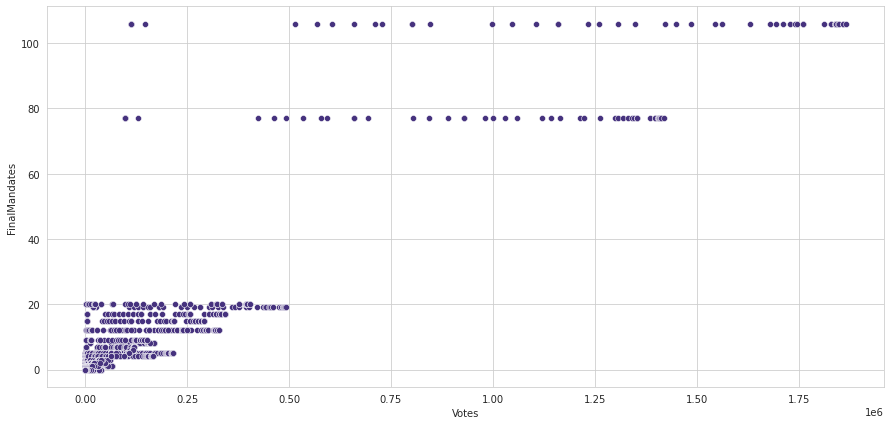

In [25]:
scatter('Votes')

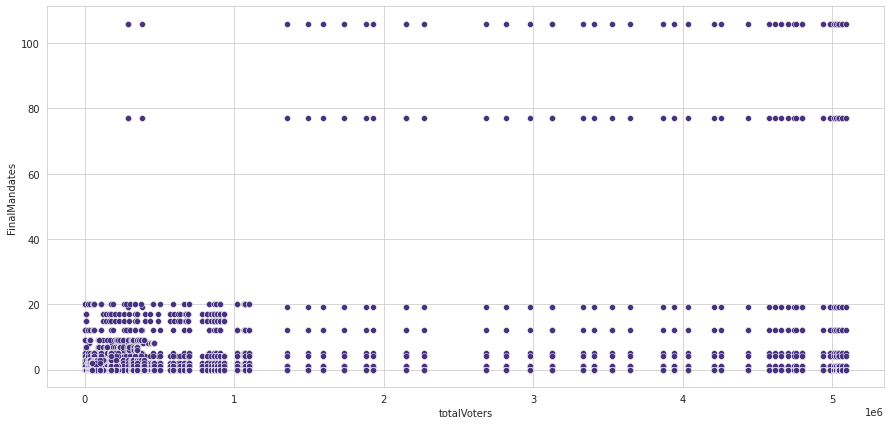

In [27]:
scatter("totalVoters")

#Data Preprocessing:

In [29]:
#One Hot encoding:

In [30]:
df.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

In [33]:
def encoder(column):
  global df
  print(df.shape)
  cols = pd.get_dummies(df[column], drop_first=True)
  df = pd.concat([df,cols], axis = 1)
  df.drop(column, axis = 1, inplace = True)
  print(df.shape)


In [34]:
encoder("Party")

(21643, 28)
(21643, 47)


In [35]:
encoder("territoryName")

(21643, 47)
(21643, 66)


In [38]:
df.drop(["TimeElapsed", "time"], axis = 1, inplace = True)

Lets normalize the numeric features

In [39]:
X = df.drop("FinalMandates", axis = 1)
y = df['FinalMandates']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
from sklearn.preprocessing import Normalizer
normal = Normalizer().fit(X_train.values)
X_train = normal.transform(X_train.values)
X_test = normal.transform(X_test.values)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_sc, y_train)
y_pred = linreg.predict(X_test_sc)
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
r2 = r2_score(y_test, y_pred)
exp_var_sc = explained_variance_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nMean Squared Error: ", mse)
print("\nR2 Score: ", r2)
print("\nExplained Variance Score: ", exp_var_sc)



Mean Squared Error:  40.048870465191406

R2 Score:  0.23710650057628502

Explained Variance Score:  0.23718578266959656


In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0).fit(X_train_sc, y_train)
y_pred = dtr.predict(X_test_sc)
r2 = r2_score(y_test, y_pred)
exp = explained_variance_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nMean Squared Error: ", mse)
print("\nR2 Score: ", r2)
print("\nExplained Variance Score: ", exp)


Mean Squared Error:  0.02254666420255036

R2 Score:  0.9995705071490402

Explained Variance Score:  0.9995705097514672


So Decision Tree Regressor is Working greatly , with an R2 score of nearly 1. So we will select Decision Tree Regressor as our prediction model.

pipeline will contain Standard Scaler, and then model as input

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [48]:
pipeline = Pipeline([
                     ('Standard Scaler', StandardScaler()),
                     ('Decision Tree Regressor', DecisionTreeRegressor(random_state = 0))
])

In [49]:
pipeline.fit(X_train_sc, y_train)
joblib.dump(pipeline, 'Model.joblib')

['Model.joblib']